In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import predict
from IPython.display import Image

In [27]:
dataset = pd.read_csv('data.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [28]:
def standardize(x):
    x_mean = np.mean(x)
    x_std = np.std(x)
    x_stand = (x - x_mean) / x_std
    return x_stand

x_initial = x
y_initial = y

x = standardize(x)
y = standardize(y)

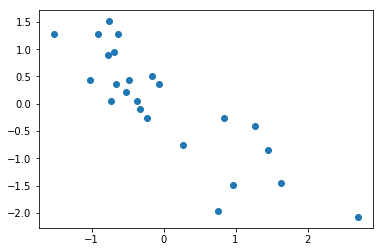

In [29]:
plt.scatter(x, y)

In [32]:
theta = predict.get_params()
print(theta)

[[ 0.]
 [ 0.]]


Pour pouvoir multiplier les matrices X et theta, on ajoute une colonne de 1 à X, ainsi on obtient:

$X = \begin{bmatrix} x^{(1)} & 1 \\ ... & ...\\x^{(m)} & 1 \end{bmatrix}$

$\theta = \begin{bmatrix} a\\b \end{bmatrix}$

$y = \begin{bmatrix} y^{(1)}\\...\\y^{(m)} \end{bmatrix}$ 

In [64]:
X = np.hstack((x, np.ones(x.shape)))

In [30]:
y = y.reshape(y.shape[0],1)

## Implemantation du modèle Linéaire
On implémente un modèle de la forme $F = X.\theta$

In [33]:
def model(X, theta):
    return X.dot(theta)

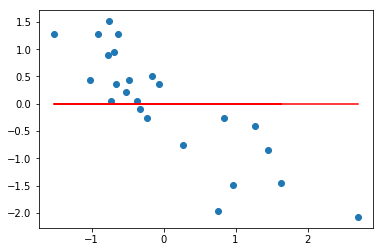

In [34]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

## Equation de la fonction cout :

$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $

In [35]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)


In [36]:
cost_function(X, y, theta)

0.5

## Formule du gradient:

$\frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(X.\theta - y)$

In [37]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

## Pour calculer la descente de gradient: 
$\theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta}$

In [38]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# Phase d'entrainement:

In [39]:
learning_rate=0.01
n_iterations=700
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

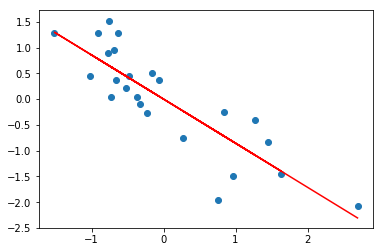

In [40]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

# Courbe d'apprentisage

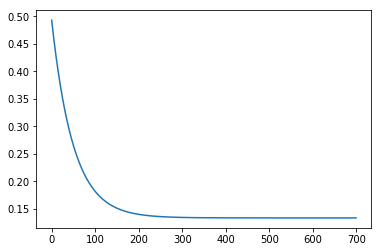

In [41]:
plt.plot(range(n_iterations), cost_history)

# Evaluation de la performance du modele
 Plus le résultat est proche de 1, plus le modele est performant

In [42]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [43]:
coef_determination(y, predictions)

0.73297413981437642

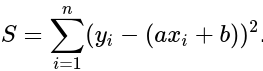

In [53]:
Image(filename='somme.png')

# Pour trouver les  valeurs de a et b par la methode des moindres  carres, il faut resoudre l equation suivante:

In [ ]:
$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $

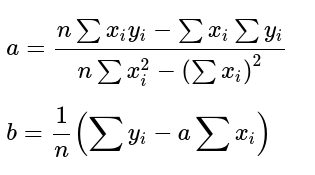

In [55]:
# on obtient:
Image(filename='a_b.png')

In [44]:
def MoindreCarre(x, y):
    x_sum = 0.
    x2_sum = 0.
    y_sum = 0.
    xy_sum = 0.
    
    for xi, yi in zip(x, y):
        x_sum += xi
        x2_sum += xi**2
        y_sum += yi
        xy_sum += xi * yi
        
    npoints = len(x)
    a = (npoints * xy_sum - x_sum * y_sum) / (npoints * x2_sum - x_sum**2)
    b = y_sum - a * x_sum / npoints
    return a, b

In [45]:
a2, b2 = MoindreCarre(x, y)
theta2 = np.array([a2, b2])
predictions2 = model(X, theta2)

In [46]:
coef_determination(y, predictions2)

0.73297470783149654

In [47]:
print(theta_final)
print(theta2)

[[ -8.55385752e-01]
 [  2.37772764e-16]]
[[ -8.56139421e-01]
 [  4.19904529e-15]]


In [48]:
def destandardize(a, b, xi, yi):
    y_mean = np.mean(yi)
    x_mean = np.mean(xi)
    y_std = np.std(yi)
    x_std = np.std(xi)
    
    a_destand = (y_std * a) / x_std
    div = (a * x_mean) / x_std
    b_destand = y_mean + (y_std * (b - div))
    return a_destand, b_destand

a2 = theta2[0]
b2 = theta2[1]

a = theta_final[0]
b = theta_final[1]

a2_destand, b2_destand = destandardize(a2,  b2, x_initial, y_initial)
a_destand, b_destand = destandardize(a, b, x_initial, y_initial)

print('Par la methode des moindres carre: a= {}, b={}'.format(a2_destand,  b2_destand))
print('Par la methode de descente de gradient: a= {}, b={}'.format(a_destand,  b_destand))

Methode des moindres carre: a= [-0.02144896], b=[ 8499.59964993]
Methode descente de gradient: a= [-0.02143008], b=[ 8497.69134101]


In [49]:
def save_theta(a, b):
    with open('params.txt', 'w') as file:
        thetas = file.write(f'{a} \n{b}')

In [50]:
save_theta(float(a_destand), float(b_destand))